In [69]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2022-10-28'

# Tickers of assets
assets = ['TSLA','BTC-USD', 'ETH-USD' , 'AVAX-USD', 'MATIC-USD', 'SOL-USD','AAPL','AMZN', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  29 of 29 completed


In [70]:
Y = data[assets].pct_change().dropna()

display(Y.head())

# send data to csv. Just doing this because I want to see how many rows there are
Y.to_csv('data.csv')

,AAPL,AMZN,APA,AVAX-USD,BA,BAX,BMY,BTC-USD,CNP,DE,...,PCAR,PSA,SEE,SOL-USD,T,TMO,TSLA,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-14,1.6548%,-0.6443%,7.9073%,1.8475%,2.4538%,1.4259%,0.2424%,-0.0043%,0.3644%,3.4975%,...,1.8641%,0.4925%,2.5573%,-2.3525%,0.6721%,2.2511%,1.3186%,1.8108%,1.8182%,-2.6156%
2020-07-15,0.6877%,-2.4361%,2.2946%,0.0000%,4.4343%,2.8824%,2.3838%,-0.5450%,0.1037%,1.6690%,...,2.1674%,-0.5365%,3.6114%,12.3270%,0.1669%,1.3524%,1.9258%,3.2199%,-0.6854%,4.7158%
2020-07-16,-1.2305%,-0.2981%,0.3618%,0.0000%,-4.9165%,-1.4697%,0.0844%,-0.6593%,-0.0518%,0.5975%,...,0.9273%,-2.2925%,2.3513%,-32.3478%,1.2662%,-0.0713%,-2.9347%,-0.4456%,1.3076%,-0.4175%
2020-07-17,-0.2020%,-1.2644%,-4.1817%,0.0000%,-1.7012%,2.0394%,1.8038%,0.2099%,2.9549%,1.7818%,...,-0.0252%,2.0809%,-0.4324%,12.0806%,-0.4607%,0.7594%,0.0133%,-0.2089%,0.9322%,-2.4858%
2020-07-18,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0836%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,-1.1509%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%


In [71]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,AAPL,AMZN,APA,AVAX-USD,BA,BAX,BMY,BTC-USD,CNP,DE,...,PCAR,PSA,SEE,SOL-USD,T,TMO,TSLA,TXT,VZ,ZION
weights,0.0000%,0.0000%,12.1754%,0.0000%,0.0000%,0.0000%,12.7480%,0.0000%,2.9210%,22.6325%,...,0.0000%,34.9218%,0.0000%,6.3646%,0.0000%,0.0000%,0.3465%,0.0000%,0.0000%,0.0000%


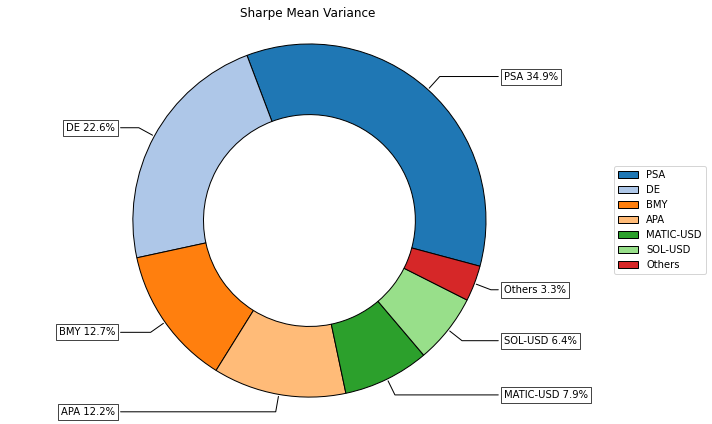

In [72]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [75]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AAPL,AMZN,APA,AVAX-USD,BA,BAX,BMY,BTC-USD,CNP,DE,...,PCAR,PSA,SEE,SOL-USD,T,TMO,TSLA,TXT,VZ,ZION
0,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,4.5538%,31.5586%,0.0000%,0.0000%,0.0000%,...,5.0901%,11.7643%,0.0000%,0.0000%,0.0000%,3.0126%,0.0000%,0.0000%,23.2163%,0.0000%
1,1.4589%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,29.3424%,0.0000%,9.6504%,10.3080%,...,3.6620%,22.0741%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,8.7820%,0.0000%
2,0.0000%,0.0000%,1.6914%,0.0000%,0.0000%,0.0000%,26.0905%,0.0000%,12.8048%,10.5351%,...,2.2340%,24.4297%,0.0000%,0.0000%,0.0000%,0.0000%,0.3710%,0.0000%,0.0000%,0.0000%
3,0.0000%,0.0000%,4.0940%,0.0000%,0.0000%,0.0000%,22.1807%,0.0000%,14.9012%,11.8008%,...,0.0000%,26.3998%,0.0000%,0.2499%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
4,0.0000%,0.0000%,7.6291%,0.0000%,0.0000%,0.0000%,13.4866%,0.0000%,16.5979%,13.3228%,...,0.0000%,29.0654%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%


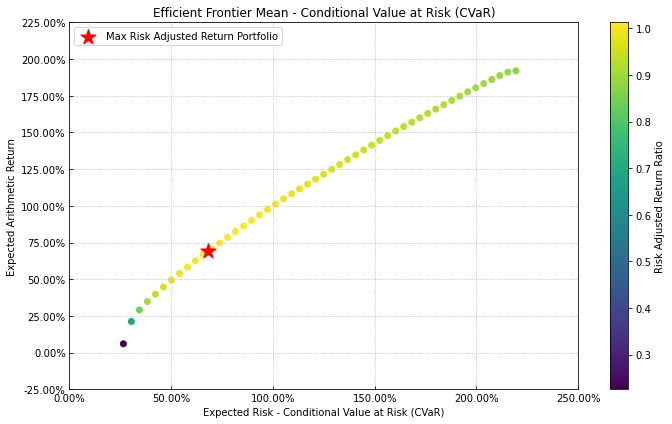

In [76]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

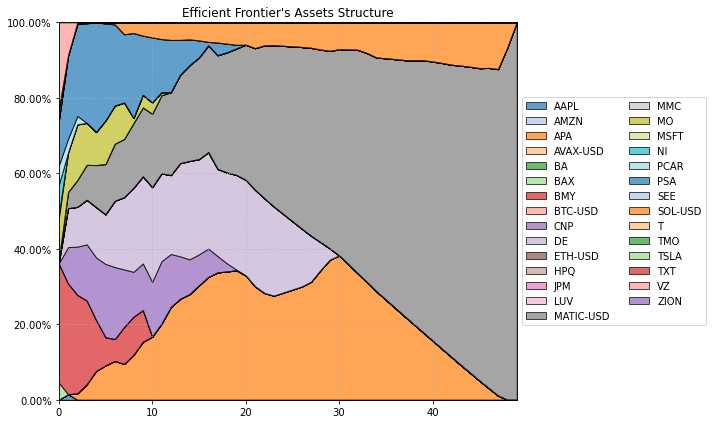

In [77]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

In [78]:
# Calculating the portfolio that maximizes Return/CVaR ratio

rm = 'CVaR' # Risk measure used, this time will be CVaR
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
display(w.T)


,AAPL,AMZN,APA,AVAX-USD,BA,BAX,BMY,BTC-USD,CNP,DE,...,PCAR,PSA,SEE,SOL-USD,T,TMO,TSLA,TXT,VZ,ZION
weights,0.0000%,0.0000%,18.3720%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,17.3762%,25.5996%,...,0.0000%,12.5848%,0.0000%,4.5500%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%


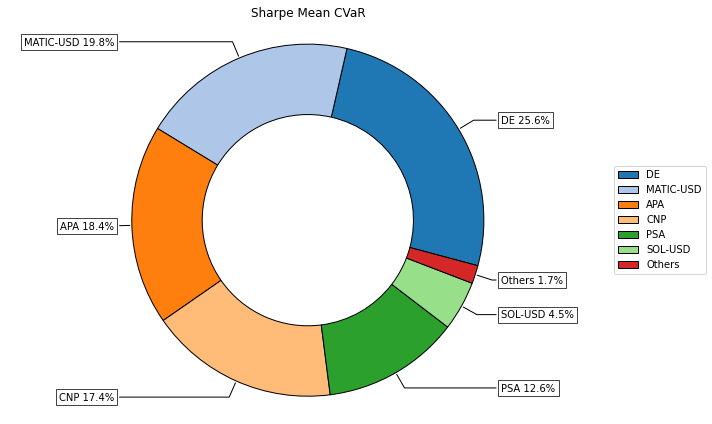

In [79]:
ax = rp.plot_pie(w=w, title='Sharpe Mean CVaR', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [80]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AAPL,AMZN,APA,AVAX-USD,BA,BAX,BMY,BTC-USD,CNP,DE,...,PCAR,PSA,SEE,SOL-USD,T,TMO,TSLA,TXT,VZ,ZION
0,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,4.5538%,31.5586%,0.0000%,0.0000%,0.0000%,...,5.0901%,11.7643%,0.0000%,0.0000%,0.0000%,3.0126%,0.0000%,0.0000%,23.2163%,0.0000%
1,1.4589%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,29.3424%,0.0000%,9.6504%,10.3080%,...,3.6620%,22.0741%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,8.7820%,0.0000%
2,0.0000%,0.0000%,1.6914%,0.0000%,0.0000%,0.0000%,26.0905%,0.0000%,12.8048%,10.5351%,...,2.2340%,24.4297%,0.0000%,0.0000%,0.0000%,0.0000%,0.3710%,0.0000%,0.0000%,0.0000%
3,0.0000%,0.0000%,4.0940%,0.0000%,0.0000%,0.0000%,22.1807%,0.0000%,14.9012%,11.8008%,...,0.0000%,26.3998%,0.0000%,0.2499%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
4,0.0000%,0.0000%,7.6291%,0.0000%,0.0000%,0.0000%,13.4866%,0.0000%,16.5979%,13.3228%,...,0.0000%,29.0654%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%


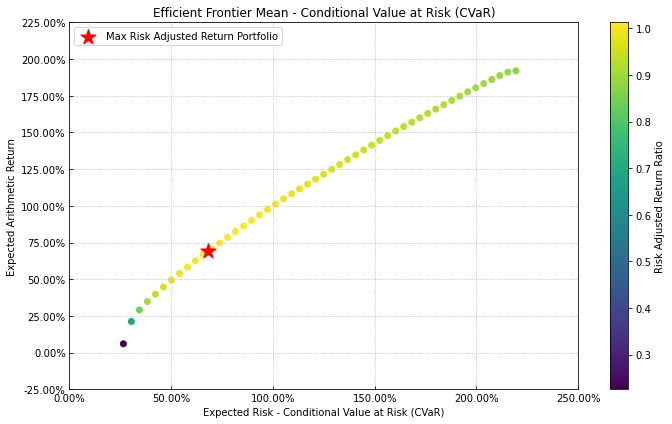

In [81]:
label = 'Max Risk Adjusted Return Portfolio' # Title of point

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

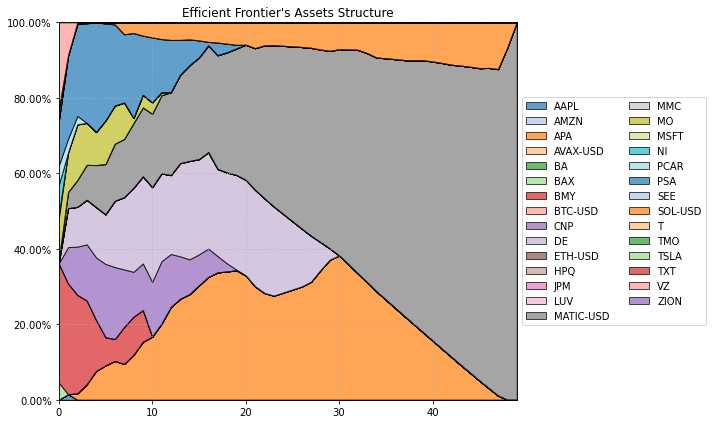

In [82]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

In [83]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms
# w_s = w_s.T tells the dataframe to transpose the data

In [ ]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)